# Figure 41.11b - Laplace Approximation of Bayesian Posterior

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import copy

Mounted at /content/drive


In [ ]:
# reading in the dataset and making it usable

with open ("/content/drive/MyDrive/Neurophysics Q2/AML/x.ext","r") as file_input:
    xin = file_input.read().split("\n")
    
for i in range(len(xin)):
    xin[i]=xin[i].split(" ")

xin = xin[:10]

X = np.array([[float (xin[i1][i2]) for i2 in range(len(xin[0]))] for i1 in range(len(xin))])
# X = X[:,1:]

with open ("/content/drive/MyDrive/Neurophysics Q2/AML/t.ext","r") as file_input:
    tin = file_input.read().split("\n")
tin = tin[:10]

t = np.array([float (tin[i1]) for i1 in range(len(tin))] )

In [ ]:
# the input and output data, cleaned
print(X,t)
N,m = np.shape(X)
print(N,m)

[[1.  2.  3. ]
 [1.  3.  2. ]
 [1.  3.  6. ]
 [1.  5.5 4.5]
 [1.  5.  3. ]
 [1.  7.  4. ]
 [1.  5.  6. ]
 [1.  8.  6. ]
 [1.  9.5 5. ]
 [1.  9.  7. ]] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
10 3


In [ ]:
# define non-linear solver
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# initialize parameters and random initial weight vector
eta = 0.001
alpha = 0.01
iterations = 1000000
w = np.random.randn(len(X[0]))*0.1

# apply gradient descent to find w*
for i in range(iterations):
    y = sigmoid(X@w)
    grad = 1/N * (y-t) @ X + ((1/m) * alpha * w)
    w -= eta * grad

wmp = copy.deepcopy(w)

In [ ]:
# find the inverse Hessian 
h = X @ wmp
sighs = sigmoid(h) * sigmoid(-h)
H_ij = (np.array([sighs,sighs,sighs]).T * X ).T @ X + eta * np.identity(len(X[0]))
H_inv = np.linalg.inv(H_ij)

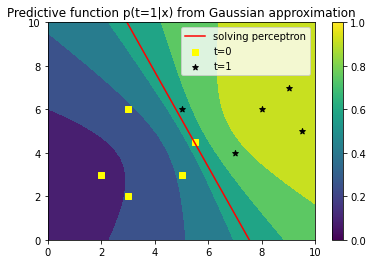

In [ ]:
# creating array from ragged prints error, but algorithm works fine;
# to remove ugly, useless error:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   

# the perceptron solution line
def line(w,x):
  return -(w[0]/w[2])/(w[0]/w[1])*x - w[0]/w[2]

xline = np.linspace(0,10,100)
yline = line(wmp,xline)

# initialize new input plane to visualize p(t=1|x) 
new_input = np.linspace(0, 10, 30)
Xnew, Ynew = np.meshgrid(new_input,new_input)

# define function to calculate approximation to p(t=1|x)
def psi_approx(x2, x3):
    x = np.array([1, x2, x3])
    a_star = wmp @ x
    s2 = x.T @ H_inv @ x
    return sigmoid(1 / np.sqrt(1 + (np.pi * s2 / 8)) * a_star)

# calculate p(t=1|x) values for the new input
Znew = psi_approx(Xnew,Ynew)

# make a contour plot of p(t=1|x), which is the requested result
plt.contourf(Xnew, Ynew, Znew)
plt.scatter(X[:5, 1], X[:5, 2], color = 'yellow',marker='s', label="t=0")
plt.scatter(X[5:, 1], X[5:, 2], color = 'black', marker = '*', label="t=1")
plt.plot(xline,yline,color = 'red', label = 'solving perceptron')

plt.ylim([0,10])
plt.xlim([0,10])
plt.title("Predictive function p(t=1|x) from Gaussian approximation")
plt.legend()
plt.colorbar()
plt.show()

### Incorrect, interesting result

I tried out different variations of the gradient rule; using the one suggested by the Mackay book, I found the following result, but the correct result was obtained by using my own gradient descent rule.

The following solution does not coincide with the figure from Mackay, but it is an interesting result since the perceptron solution *does* correctly split between the two labels, whereas this does not happen very clearly for the correct plot...

In [ ]:
# using the following gradient descent rule,
# another interesting result is obtained

eta = 0.01 # learning rule
runs = 100000
alpha = 0.0001 # regularization parameter

w = np.random.randn(m)

for i in range(runs):
  a = X@w 
  y = sigmoid(a)
  e = t - y
  g = - X.T @ e
  w = w - eta * (g+alpha*w)

wmp = copy.deepcopy(w)
t,y,np.round(y),wmp

(array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),
 array([1.46650936e-09, 1.48016679e-09, 5.25397764e-03, 1.90244032e-01,
        1.23782012e-04, 9.11926012e-01, 9.10425555e-01, 9.99998834e-01,
        9.99999826e-01, 9.99999999e-01]),
 array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),
 array([-39.21857221,   3.78118504,   3.77191606]))

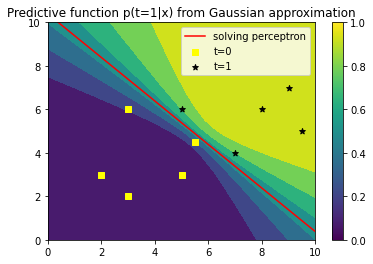

In [ ]:
# find the inverse Hessian 
h = X @ wmp
sighs = sigmoid(h) * sigmoid(-h)
H_ij = (np.array([sighs,sighs,sighs]).T * X ).T @ X + eta * np.identity(len(X[0]))
H_inv = np.linalg.inv(H_ij)

# the perceptron solution line
def line(w,x):
  return -(w[0]/w[2])/(w[0]/w[1])*x - w[0]/w[2]

xline = np.linspace(0,10,100)
yline = line(wmp,xline)

# creating array from ragged prints error, but algorithm works fine;
# to remove ugly, useless error:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   

# initialize new input plane for which to calculate p(t=1|x) 
new_input = np.linspace(0, 10, 30)
Xnew, Ynew = np.meshgrid(new_input,new_input)

# define function to calculate approximation to p(t=1|x)
def psi_approx(x2, x3):
    x = np.array([1, x2, x3])
    a_star = wmp @ x
    s2 = x.T @ H_inv @ x
    return sigmoid(1 / np.sqrt(1 + (np.pi * s2 / 8)) * a_star)

# calculate p(t=1|x) values for the new input
Znew = psi_approx(Xnew,Ynew)

# make a contour plot of p(t=1|x), which is the requested result
plt.contourf(Xnew, Ynew, Znew)
plt.scatter(X[:5, 1], X[:5, 2], color = 'yellow',marker='s', label="t=0")
plt.scatter(X[5:, 1], X[5:, 2], color = 'black', marker = '*', label="t=1")
plt.plot(xline,yline,color = 'red', label = 'solving perceptron')

plt.ylim([0,10])
plt.xlim([0,10])
plt.title("Predictive function p(t=1|x) from Gaussian approximation")
plt.legend()
plt.colorbar()
plt.show()